In [3]:
from perceptron import Perceptron
import numpy as np
import matplotlib.pyplot as plt
from data_generator import DataGenerator

In [18]:
nd = 200
nmax = 100

alpha_range = np.arange(1.5, 2.5, 0.1)
N_range = np.arange(10, 101, 20)
results = []

for N in N_range:
    
    print(f"Doing {N=}")
    
    generator = DataGenerator(N)
    success_runs = np.zeros(len(alpha_range))

    for i, alpha in enumerate(alpha_range):
        P = int(alpha * N)

        success_sum = 0
        for _ in range(nd):
            perceptron = Perceptron(N)
            X, Y = generator.generate(P)
            if perceptron.train(X, Y, nmax):
                success_sum += 1

        success_runs[i] = float(success_sum) / float(nd)
    
    results.append(success_runs)

Doing N=10
Doing N=30
Doing N=50
Doing N=70
Doing N=90


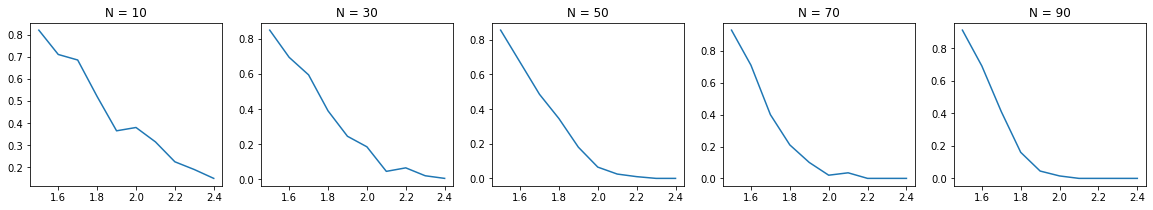

In [20]:
fig, plots = plt.subplots(1, len(results), figsize=(20, 3))
for i, plot in enumerate(plots):
    plot.plot(alpha_range, results[i])
    plot.set_title(f"N = {N_range[i]}")